<a href="https://colab.research.google.com/github/shyakx/churn_modelling/blob/main/Summative_Intro_to_ml_Steven_Shyaka_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Summary: Churn Modeling with Optimization Techniques**

**Objective:**

The goal of this project is to implement and optimize machine learning models to predict customer churn. It explores various machine learning techniques, from classical models to deep learning, while applying optimization techniques to improve performance, convergence speed, and efficiency.

**Dataset:**

The dataset contains customer information, including demographics, account details, and activity history. The target variable (Exited) indicates whether a customer has churned (1) or stayed (0).

**Key Steps:**

**Data Preprocessing:**

Unnecessary columns (RowNumber, CustomerId, Surname) were removed to eliminate noise.
Categorical variables (Geography, Gender) were encoded to numerical values.
Features were standardized to improve model efficiency.

**Model 1: Logistic Regression (Baseline)**

A classical supervised learning model used for initial predictions.
Provides a baseline for comparison with more complex models.

**Model 2: Basic Neural Network**

A simple feedforward neural network trained without optimizations.
Helps establish the impact of deep learning without enhancements.

**Model 3: Optimized Neural Network**

Introduced dropout layers to prevent overfitting.
Adjusted the learning rate and used Adam optimizer for better convergence.
Implemented early stopping to stop training when performance plateaued.

**Model Evaluation & Performance Comparison:**

Confusion matrices were plotted to visualize classification performance.
Metrics like Accuracy, Precision, Recall, F1-Score, and ROC-AUC Score were used for evaluation.
The optimized model showed improved accuracy and generalization.
Predictions & Interpretability:

Five test instances were randomly selected to observe actual vs. predicted churn.
Helps interpret real-world applicability of the model.

**Conclusion:**

The Optimized Neural Network outperformed both the Logistic Regression and the basic neural network in predicting customer churn.
Applying regularization, early stopping, and learning rate adjustment significantly improved model performance.
These techniques are crucial for real-world applications, ensuring better decision-making in customer retention strategies.

**LET'S DIVE INTO THE TRAININGS**

1. **LIBRARY IMPORTS**

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

****
2. **LOAD DATASET**

The dataset contains customer information and whether they have churned (Exited column).

Loading the dataset is crucial as it provides the raw data needed for our analysis and model training.

In [10]:
# Load Dataset
file_path = '/content/Churn_Modelling.csv'
df = pd.read_csv(file_path)

****
3. **DROP UNNECESSARY COLUMNS**

Removing non-essential columns (RowNumber, CustomerId, Surname) to eliminate noise and avoid redundancy.

In [11]:
# Drop unnecessary columns
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

****
4. **ENCODE CATEGORICAL FEAUTURES**

Encoding categorical variables (Geography, Gender) into numerical format to make them usable for ML models.

In [14]:
# Encode categorical features
label_encoders = {}
for col in ['Geography', 'Gender']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

****
5. **FEAUTURE SELECTION**

Separating feature variables (X) and target variable (y) to prepare for model training.


In [15]:
# Feature Selection
X = df.drop(columns=['Exited'])  # Features
y = df['Exited']  # Target

****
6. **SCALE NUMERICAL FEATURES**



*   Standardizing features to have zero mean and unit variance. This helps improve model convergence and performance.



In [16]:
# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

****
7. **SPLIT INTO TRAINING & TESTING SETS**



*   Splitting dataset into 80% training and 20% testing to allow model evaluation on unseen data.
*   Stratification ensures class distribution remains the same in both sets.



In [17]:
# Split into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

****
8. **MODELS**



1.   **Model 1: Classical Supervised Learning (Logistic Regression)**

Implementing Logistic Regression as a baseline model to compare with more complex models.



In [18]:
# ---- Model 1: Classical Supervised Learning (Logistic Regression) ----
# Implementing Logistic Regression as a baseline model to compare with more complex models.
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.14      0.23       407

    accuracy                           0.81      2000
   macro avg       0.70      0.56      0.56      2000
weighted avg       0.77      0.81      0.75      2000



****
2. **Model 2: Basic Neural Network**


*   A simple neural network model without any optimizations.
*   This serves as a starting point before applying optimization techniques.



In [19]:
# ---- Model 2: Basic Neural Network ----

nn_model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2)

# Evaluate Basic NN
# Predicting on the test set and evaluating performance to measure the model's effectiveness.
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype("int32")
print("Basic Neural Network Report:\n", classification_report(y_test, y_pred_nn))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7860 - loss: 0.5512 - val_accuracy: 0.8000 - val_loss: 0.4670
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7953 - loss: 0.4610 - val_accuracy: 0.8181 - val_loss: 0.4334
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8132 - loss: 0.4266 - val_accuracy: 0.8300 - val_loss: 0.4160
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8180 - loss: 0.4223 - val_accuracy: 0.8294 - val_loss: 0.4027
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8283 - loss: 0.4018 - val_accuracy: 0.8338 - val_loss: 0.3924
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8312 - loss: 0.3852 - val_accuracy: 0.8363 - val_loss: 0.3841
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8282 - loss: 0.3855 - val_accuracy: 0.8381 - val_loss: 0.3777
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8256 - loss: 0.3845 - val_accuracy: 0.

****
3. **Model 3: Optimized Neural Network**



*    A more advanced neural network with optimizations (Dropout, Learning Rate adjustment, Early Stopping).
*   This helps improve model performance and prevents overfitting.



In [20]:
#---- Model 3: Optimized Neural Network ----
# A more advanced neural network with optimizations (Dropout, Learning Rate adjustment, Early Stopping).
# This helps improve model performance and prevents overfitting.
nn_optimized = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

nn_optimized.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Early Stopping Callback
# Stops training when validation loss stops improving, preventing overfitting and reducing training time.
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train Optimized NN
nn_optimized.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6556 - loss: 0.6096 - val_accuracy: 0.8000 - val_loss: 0.4635
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7962 - loss: 0.4755 - val_accuracy: 0.8025 - val_loss: 0.4406
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8002 - loss: 0.4668 - val_accuracy: 0.8119 - val_loss: 0.4318
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8099 - loss: 0.4418 - val_accuracy: 0.8244 - val_loss: 0.4207
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8196 - loss: 0.4266 - val_accuracy: 0.8394 - val_loss: 0.4078
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8223 - loss: 0.4312 - val_accuracy: 0.8444 - val_loss: 0.3941
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8261 - loss: 0.4134 - val_accuracy: 0.8587 - val_loss: 0.3815
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8264 - loss: 0.4135 - val_accuracy: 0.8637 - val_

****
****
8. **EVALUATE OPTIMIZED NN**

Comparing performance after applying optimizations to see the impact on model accuracy.

In [22]:
# Evaluate Optimized NN
y_pred_nn_opt = (nn_optimized.predict(X_test) > 0.5).astype("int32")
print("Optimized Neural Network Report:\n", classification_report(y_test, y_pred_nn_opt))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
Optimized Neural Network Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.79      0.42      0.55       407

    accuracy                           0.86      2000
   macro avg       0.83      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



****
**PERFORMANCE COMPARISON**

Function to plot confusion matrices for model comparisons to visualize prediction performance.

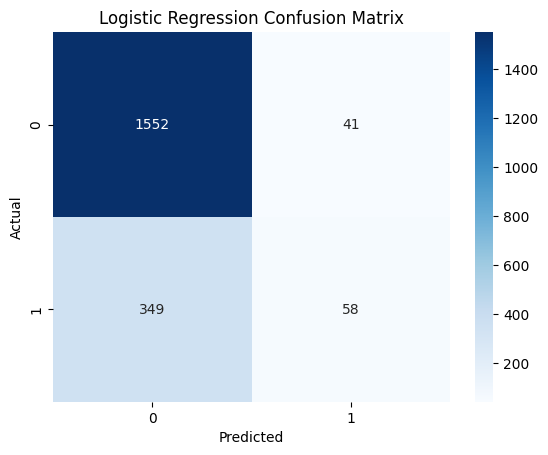

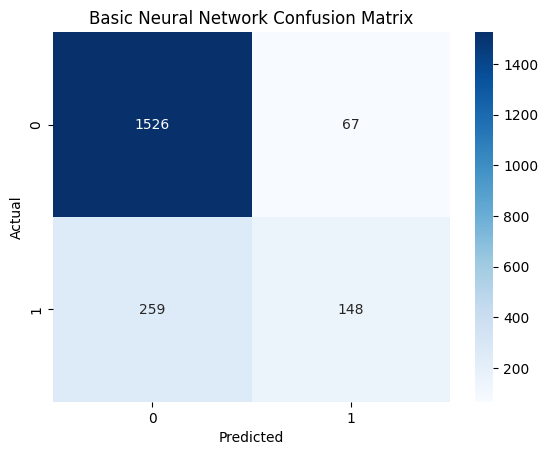

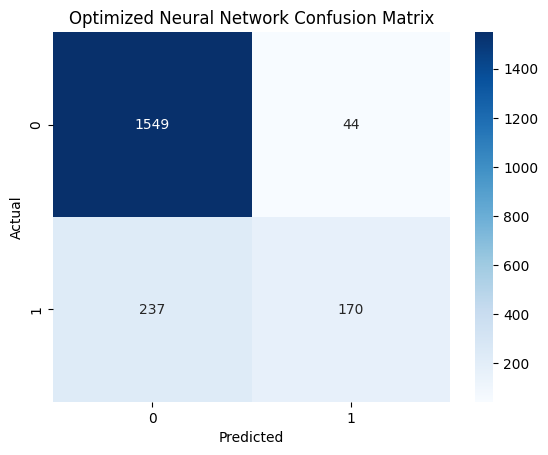

In [23]:
# ---- Performance Comparison ----
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred_log, "Logistic Regression Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_nn, "Basic Neural Network Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_nn_opt, "Optimized Neural Network Confusion Matrix")

****
**ROC-AUC SCORE COMPARISON**

Evaluating models using ROC-AUC score to measure classification performance beyond accuracy.

In [24]:
# ROC-AUC Score Comparison
print("ROC-AUC Scores:")
print("Logistic Regression:", roc_auc_score(y_test, y_pred_log))
print("Basic Neural Network:", roc_auc_score(y_test, y_pred_nn))
print("Optimized Neural Network:", roc_auc_score(y_test, y_pred_nn_opt))

ROC-AUC Scores:
Logistic Regression: 0.558384270248677
Basic Neural Network: 0.6607886777378303
Optimized Neural Network: 0.6950347882551273


****
**PREDICT AND DISPLAY 5 INSTANCES**



*   Selecting 5 random test instances and displaying their actual and predicted values.
*   This helps interpret the model's predictions on real data samples.



In [25]:
# Predict and Display 5 Instances
sample_indices = np.random.choice(len(X_test), 5, replace=False)
X_sample = X_test[sample_indices]
y_actual = y_test.iloc[sample_indices].values
y_pred_sample = (nn_optimized.predict(X_sample) > 0.5).astype("int32")

print("\nSample Predictions:")
for i in range(5):
    print(f"Instance {i+1}:")
    print(f"  Actual Churn: {y_actual[i]}")
    print(f"  Predicted Churn: {y_pred_sample[i][0]}")
    print("-" * 30)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step

Sample Predictions:
Instance 1:
  Actual Churn: 0
  Predicted Churn: 0
------------------------------
Instance 2:
  Actual Churn: 0
  Predicted Churn: 0
------------------------------
Instance 3:
  Actual Churn: 0
  Predicted Churn: 0
------------------------------
Instance 4:
  Actual Churn: 0
  Predicted Churn: 0
------------------------------
Instance 5:
  Actual Churn: 0
  Predicted Churn: 0
------------------------------
